<a href="https://colab.research.google.com/github/trushee/InnerveSite/blob/main/AI_ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import os
import shutil
import glob

In [ ]:
!wget https://www.dropbox.com/s/hvjcry7iypbicz4/dataset2.zip?dl=0
!unzip "/content/dataset2.zip?dl=0"

#!unzip "/content/train.zip"
# !unzip "/content/machine_parts.zip"
# !unzip "/content/random.zip"

--2022-07-31 06:41:03--  https://www.dropbox.com/s/hvjcry7iypbicz4/dataset2.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/hvjcry7iypbicz4/dataset2.zip [following]
--2022-07-31 06:41:03--  https://www.dropbox.com/s/raw/hvjcry7iypbicz4/dataset2.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbef278d63a32ed20bc405a8710.dl.dropboxusercontent.com/cd/0/inline/BqHyo-JiO-dAJbpSrDTEyPQQFV1AloE3OGa1h1fhl-r5VScuGAQFuzHKanMxhNEB8KqfzW4YXSf7PuL_CaiXRbmKgfJfLTrE2-AfJ-cBgoaErJiw7OGMmUldzABsEqPVnFoMOYaP0vtMU265Cr-x8_pl565nEgAr09VSV7kkRYJh4Q/file# [following]
--2022-07-31 06:41:03--  https://ucbef278d63a32ed20bc405a8710.dl.dropboxusercontent.com/cd/0/inline/BqHyo-JiO-dAJbpSrDTEyPQQFV1AloE3OGa1h1fhl-r5VScuGAQFuzHKanMxhNE

In [ ]:
train_dir="./dataset"
org_dir = "/content/train"

CLASS = ['machine', 'random']

In [ ]:
for c in CLASS:
  DEST = os.path.join(train_dir,c)
  if not os.path.exists(DEST):
    os.makedirs(DEST)
  for img_path in glob.glob(os.path.join(org_dir,c)+"*"):
    SRC= img_path

    shutil.copy(SRC,DEST)

In [ ]:
os.listdir("/content/dataset/machine")

[]

Model building

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.layers import Dense, Flatten
from keras.models import Model 
from keras.applications.inception_v3 import InceptionV3, preprocess_input
from keras.preprocessing.image import ImageDataGenerator, load_img , img_to_array
import keras

In [ ]:
base_model = InceptionV3(input_shape=(256,256,3),include_top=False)

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
  layer.trainable = False

In [ ]:
x = Flatten()(base_model.output)
x = Dense(units=2 , activation="sigmoid")(x)

#final model
model = Model(base_model.input,x)

#compile the model
model.compile(optimizer= "adam",loss = keras.losses.binary_crossentropy,metrics=["accuracy"])

#summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 127, 127, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 127, 127, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

Preprocessing using datagen

In [ ]:
train_datagen = ImageDataGenerator(featurewise_center=True,
                                   rotation_range=0.4,
                                   width_shift_range=0.3,
                                   horizontal_flip=True,
                                   preprocessing_function=preprocess_input,
                                   zoom_range=0.4,
                                   shear_range=0.4
                                   )

train_data=train_datagen.flow_from_directory(directory="/content/dataset2/train",target_size=(256,256) )

Found 78 images belonging to 2 classes.


In [ ]:
train_data.class_indices

{'machine_parts': 0, 'random': 1}

Visualizing the data

In [ ]:
t_img,label =train_data.next()

In [ ]:
t_img.shape

(32, 256, 256, 3)

In [ ]:
def plotImages(img_arr,label):
  for idx,img in enumerate(img_arr):
    if idx<30:
      plt.figure(figsize=(5,5))
      plt.imshow(img)
      plt.title(img.shape)
      plt.axis=False
      plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


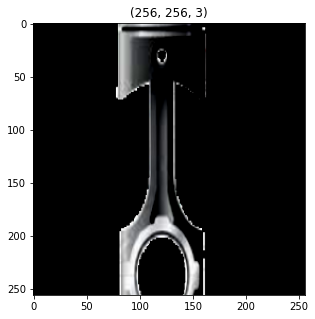

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


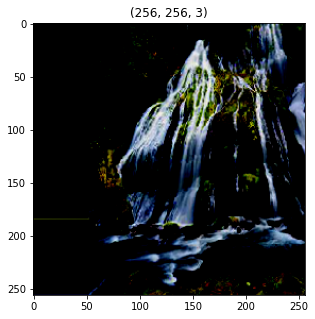

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


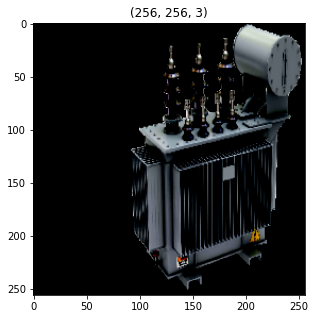

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


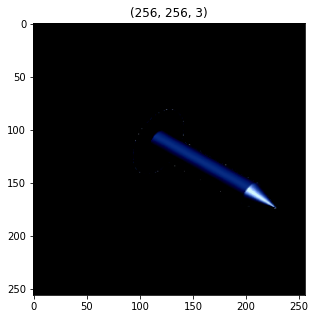

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


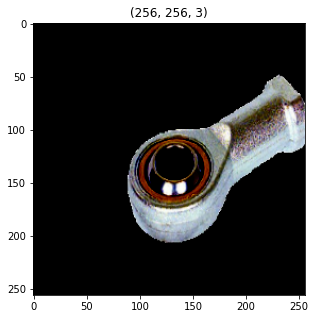

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


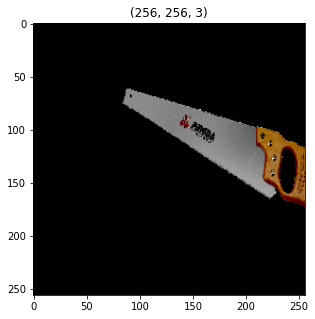

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


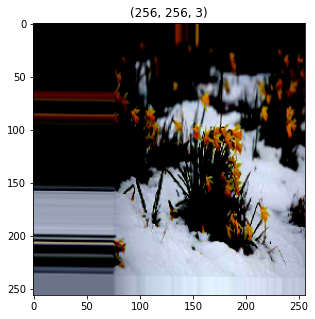

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


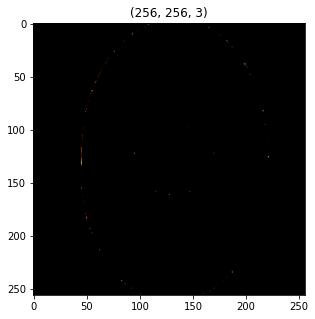

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


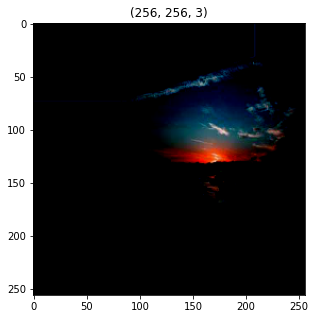

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


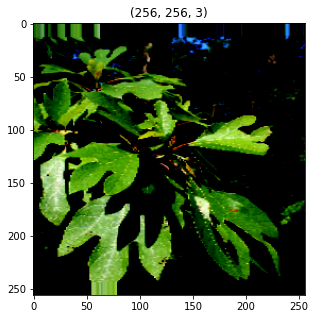

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


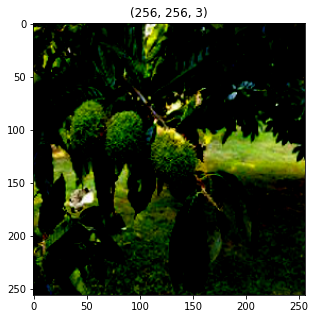

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


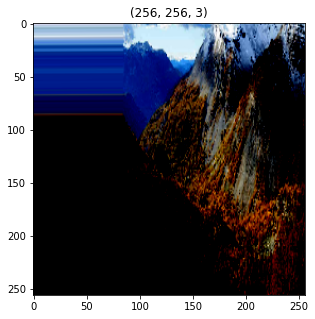

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


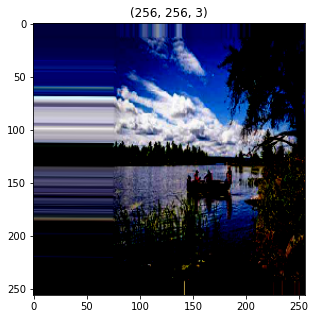

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


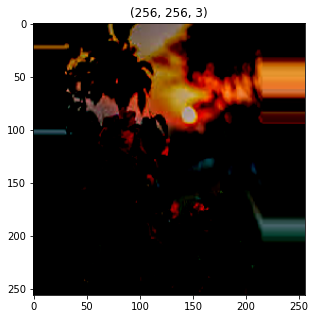

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


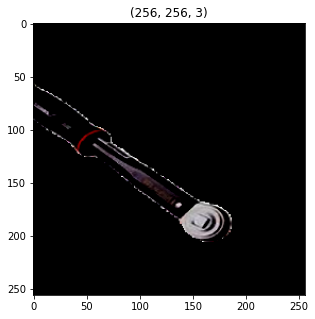

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


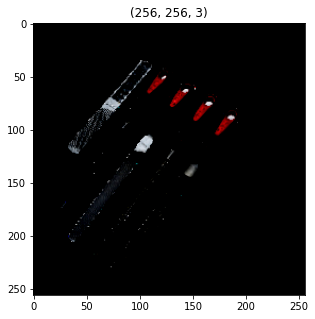

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


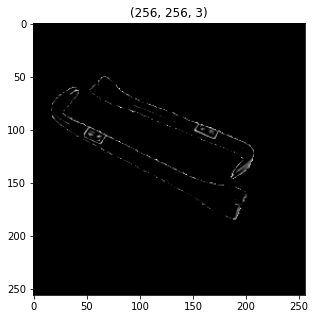

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


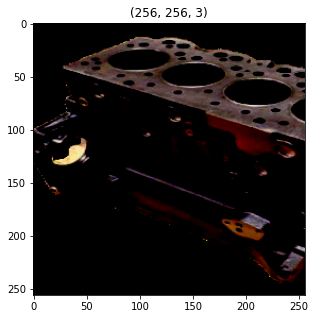

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


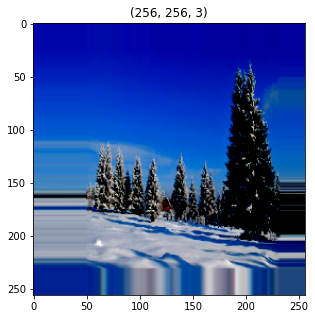

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


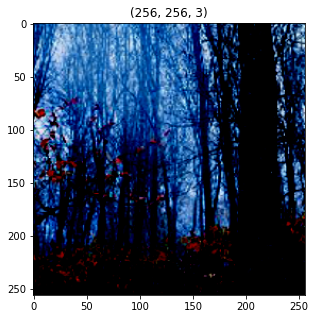

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


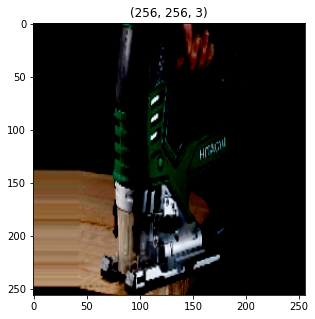

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


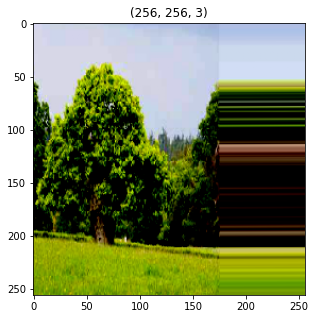

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


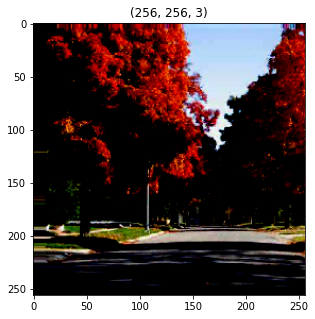

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


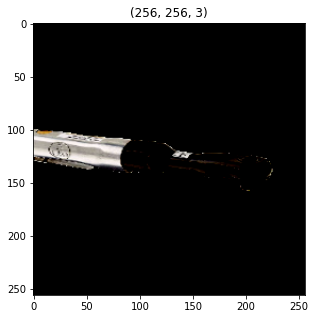

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


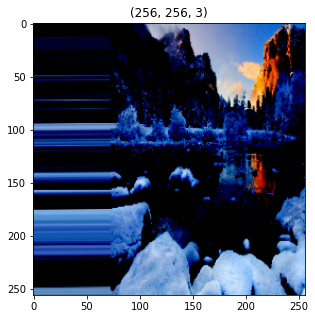

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


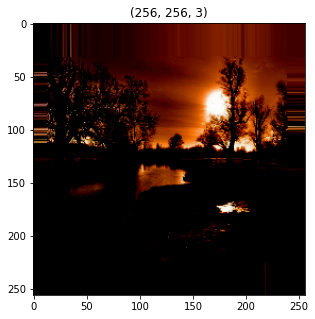

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


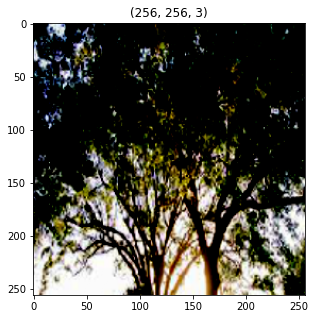

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


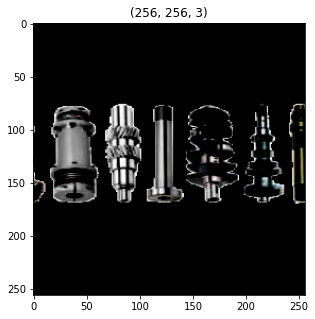

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


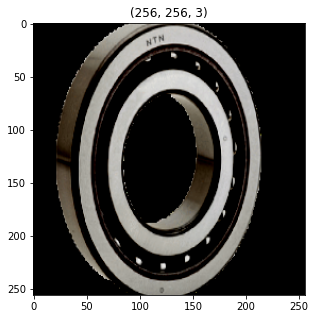

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


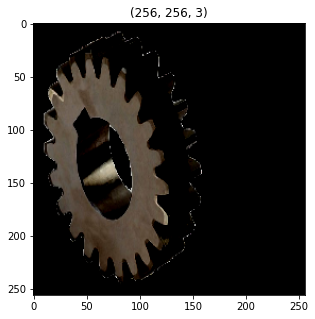

In [ ]:
plotImages(t_img,label)

Model CheckPoint

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
mc = ModelCheckpoint(filepath="./best_model.h5",
                     monitor="accuracy",
                     verbose=1,
                     save_best_only=True)

es = EarlyStopping(monitor="accuracy", min_delta=0.01,patience=5,verbose=1)

cb=[mc,es]

In [ ]:
his = model.fit_generator(train_data,steps_per_epoch=2,epochs=29,callbacks=cb)

Epoch 1/29
2/2 [==============================] - ETA: 0s - loss: 1.1435 - accuracy: 0.6719 
Epoch 1: accuracy improved from -inf to 0.67188, saving model to ./best_model.h5
2/2 [==============================] - 17s 5s/step - loss: 1.1435 - accuracy: 0.6719
Epoch 2/29
2/2 [==============================] - ETA: 0s - loss: 0.2850 - accuracy: 0.9844
Epoch 2: accuracy improved from 0.67188 to 0.98438, saving model to ./best_model.h5
2/2 [==============================] - 12s 5s/step - loss: 0.2850 - accuracy: 0.9844
Epoch 3/29
2/2 [==============================] - ETA: 0s - loss: 0.3311 - accuracy: 0.9783
Epoch 3: accuracy did not improve from 0.98438
2/2 [==============================] - 9s 3s/step - loss: 0.3311 - accuracy: 0.9783
Epoch 4/29
2/2 [==============================] - ETA: 0s - loss: 0.0257 - accuracy: 1.0000
Epoch 4: accuracy improved from 0.98438 to 1.00000, saving model to ./best_model.h5
2/2 [==============================] - 9s 3s/step - loss: 0.0257 - accuracy: 1.00

In [ ]:
from keras.models import load_model
model = load_model("/content/best_model.h5")

In [ ]:
h= his.history
h.keys()

dict_keys(['loss', 'accuracy'])

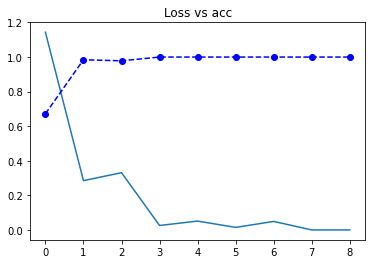

In [ ]:
plt.plot(h['loss'])
plt.plot(h['accuracy'] ,"go--", c="blue")
plt.title("Loss vs acc")
plt.show()

**VALIDATE OUR IMAGE**

In [ ]:
path = "/content/gear.jpg"
img = load_img(path, target_size = (256,256))

i = img_to_array(img)
i = preprocess_input(i)



input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

if pred == 0:
  print("Yes this is a machine part")

else:
  print("No this is not a machine part")

#to display image

plt.imshow(input_arr[0])
plt.title("input image")
plt.axis = False
plt.show()

NameError: ignored

Grad Cam

In [ ]:
def get_img_arr(img_path):
  path = img_path
  img= load_img(path,target_size=(256,256))
  img =img_to_array(img)
  img =preprocess_input(img)
  img = np.array([i])
  return img

In [ ]:
import tensorflow as tf

In [ ]:
def make_gracam_heatmap(img_arr,model,last_conv_layer_name,pred_index=None):
  grad_model= tf.keras.models.Model(
      [model.input],[model.get_layer(last_conv_layer_name).output,model.output]
  )
  with tf.GradientTape() as tape:
    last_conv_layer_output , preds = grad_model(img_arr)

    if pred_index is None:
      pred_index = tf.argmax(preds[0])

    class_channel = preds[: , pred_index]

  grads = tape.gradient(class_channel, last_conv_layer_output)

  pooled_grads= tf.reduce_mean(grads, axis=(0,1,2))
  last_conv_layer_output = last_conv_layer_output[0]
  heatmap = last_conv_layer_output @ pooled_grads[...,tf.newaxis]
  heatmap = tf.squeeze(heatmap)

  heatmap=tf.maximum(heatmap,0) / tf.math.reduce_max(heatmap)
  return heatmap.numpy()

mask heatmap on image

In [ ]:
import matplotlib.cm as cm
from IPython.display import Image,display

In [ ]:
def save_and_display_gradcam(img_path , heatmap, cam_path ="cam.jpg",alpha =0.4):
  img = img_to_array(load_img(img_path))

  heatmap = np.uint8(255*heatmap)

  jet = cm.get_cmap("jet")

  jet_colors = jet(np.arange(256))[:,:3]
  jet_heatmap = jet_colors[heatmap]

  jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
  jet_heatmap = jet_heatmap.resize((img.shape[1],img.shape[0]))
  jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)

  superimposed_img = jet_heatmap * alpha+img 
  superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)

  superimposed_img.save(cam_path)

  display(Image(cam_path))

In [ ]:
def image_prediction_and_visualization(path,last_conv_layer_name="conv2d_93",model=model):
  # path = "/content/dataset/train/test1.jpeg"
  img_array = get_img_arr(path)
  heatmap= make_gracam_heatmap(img_array,model,last_conv_layer_name)

  plt.title("the heatmap of the image is")
  plt.imshow(heatmap)
  plt.show()

  
  # img = load_img(path, target_size = (256,256))

  # i = img_to_array(img)
  # i = preprocess_input(i)



  # input_arr = np.array([i])
  # input_arr.shape

  pred = np.argmax(model.predict(preprocess_input(img_array)))

  print()
  print()
  print()

  # if pred == 1:
    # print("Yes this is a machine part")

  if pred == 0:
    print("Yes this is a machine part")

  else:
    print("No this is not a machine part")

  print()
  print()
  print()
  print("image with heatmap representing region on interest")
  
  save_and_display_gradcam(path,heatmap)

  print()
  print("The original input image")
  print()
#to display image
  a= plt.imread(path)

  plt.imshow(a,cmap="gray")
  plt.title("original image")
  # plt.axis = False
  plt.show()

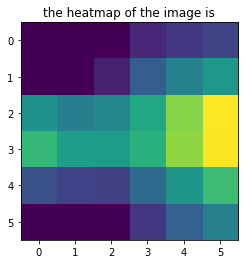




Yes this is a machine part



image with heatmap representing region on interest


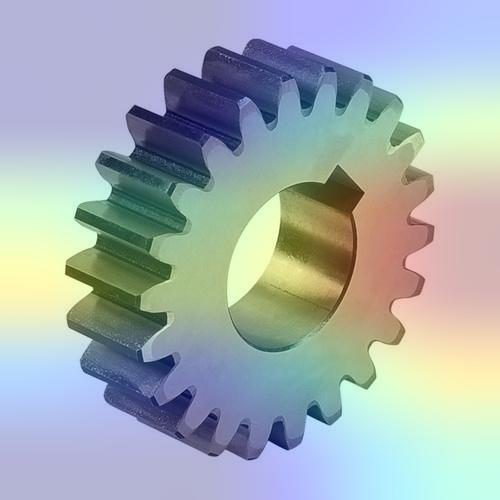


The original input image



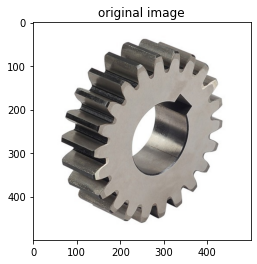

In [ ]:
path="/content/gear.jpg"
image_prediction_and_visualization(path)